Average end-to-end distance: 1.292 nm


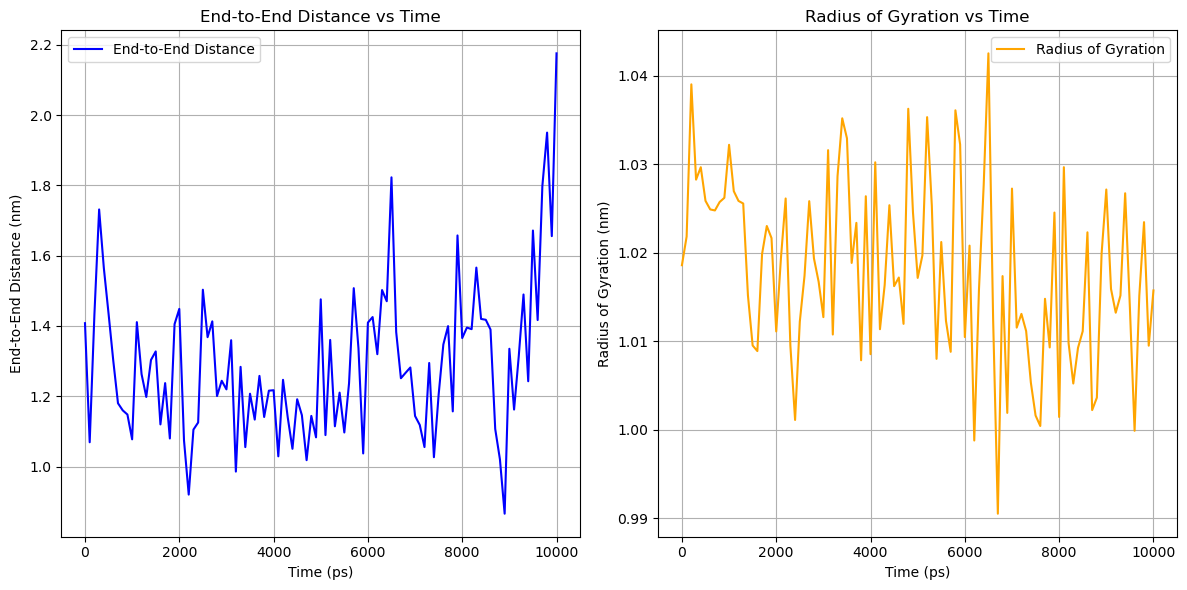

In [4]:
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import the plotting library

# Load your trajectory and topology
trajectory = md.load_xtc('/home/yhp2008/comp-lab-class-2024/Week4-CharmmGuiSetup/Protein/charmm-gui-2787978843/gromacs/protein_trajectory.xtc', top='/home/yhp2008/comp-lab-class-2024/Week4-CharmmGuiSetup/Protein/charmm-gui-2787978843/gromacs/step3_input.pdb')

# Assuming the first and last atom of the chain
first_atom_index = 0
last_atom_index = 500  # or specify the exact index if needed

# Get the coordinates of the first and last atoms
first_coords = trajectory.xyz[:, first_atom_index, :]
last_coords = trajectory.xyz[:, last_atom_index, :]

# Calculate distances
end_to_end_distances = np.linalg.norm(first_coords - last_coords, axis=1)

# Print average end-to-end distance
average_distance = np.mean(end_to_end_distances)
print(f'Average end-to-end distance: {average_distance:.3f} nm')

# Save to a file
np.savetxt('end_to_end_distances.txt', end_to_end_distances)

# Calculate radius of gyration
rg = md.compute_rg(trajectory)

# Create a time array (assuming the time step is constant, you can adjust it if needed)
time = trajectory.time  # This should be in picoseconds

# Load end-to-end distances for plotting
data = pd.read_csv('end_to_end_distances.txt', header=None, names=['End-to-End Distance'])

# Plotting
plt.figure(figsize=(12, 6))

# Plot end-to-end distance
plt.subplot(1, 2, 1)
plt.plot(time, data['End-to-End Distance'], label='End-to-End Distance', color='blue')
plt.xlabel('Time (ps)')
plt.ylabel('End-to-End Distance (nm)')
plt.title('End-to-End Distance vs Time')
plt.grid()
plt.legend()

# Plot radius of gyration
plt.subplot(1, 2, 2)
plt.plot(time, rg, label='Radius of Gyration', color='orange')
plt.xlabel('Time (ps)')
plt.ylabel('Radius of Gyration (nm)')
plt.title('Radius of Gyration vs Time')
plt.grid()
plt.legend()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()  # Display the plots